In [1]:
import requests
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

In [2]:
response = requests.get(f"https://mgrey.se/espot?format=json&date=2022-{12}-{12}")
d = response.json()

SE1 analysis

In [3]:
hours = [i["hour"] for i in d["SE1"]]
price_eur = [i["price_eur"] for i in d["SE1"]]
price_sek = [i["price_sek"] for i in d["SE1"]]
kmeans = [i["kmeans"] for i in d["SE1"]]

(array([ 1.,  0.,  0.,  9.,  0.,  0., 11.,  0.,  0.,  3.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

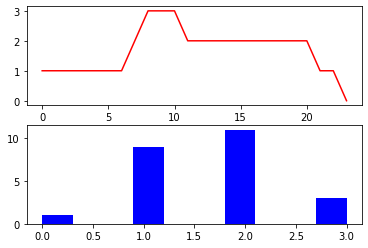

In [4]:
fig, axs = plt.subplots(2)
axs[0].plot(hours, kmeans, color="red")
axs[1].hist(kmeans, color="blue")

(array([1., 0., 7., 2., 3., 5., 3., 1., 1., 1.]),
 array([218.13 , 239.264, 260.398, 281.532, 302.666, 323.8  , 344.934,
        366.068, 387.202, 408.336, 429.47 ]),
 <BarContainer object of 10 artists>)

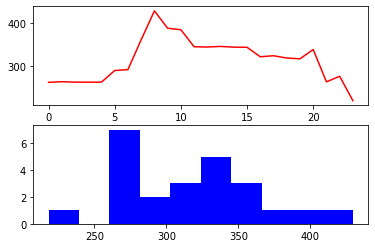

In [5]:
fig, axs = plt.subplots(2)
axs[0].plot(hours, price_sek, color="red")
axs[1].hist(price_sek, color="blue")

In [6]:
X = []
y = []

for i in range(9,11):
  for j in range(1,30):
    response = requests.get(f"https://mgrey.se/espot?format=json&date=2022-{i}-{j}")
    d = response.json()
    for k in d["SE1"]:
      X.append(k["price_sek"])
      y.append(k["hour"])

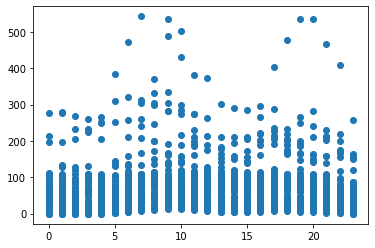

In [82]:
plt.scatter(x=y, y=X)

In [7]:
from sklearn.cluster import KMeans

trainX = np.hstack((np.array(X).reshape(-1,1), np.array(y).reshape(-1,1)))

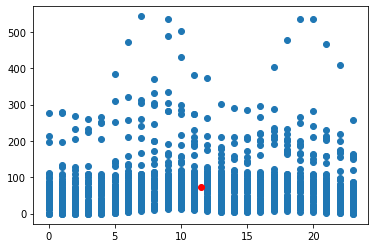

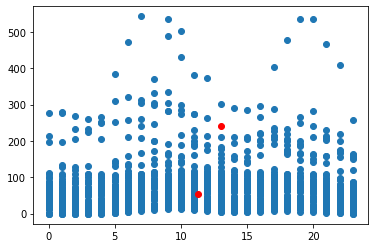

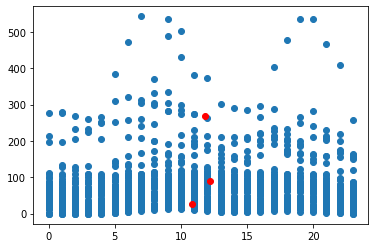

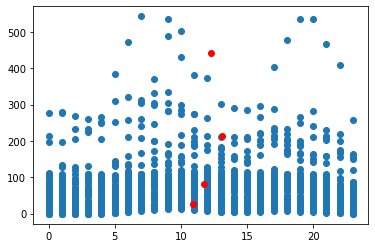

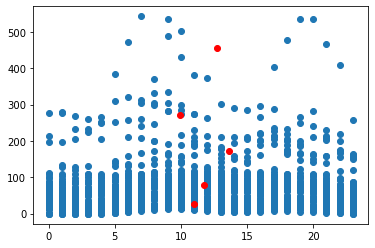

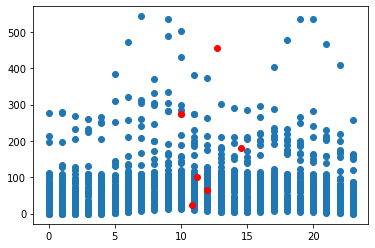

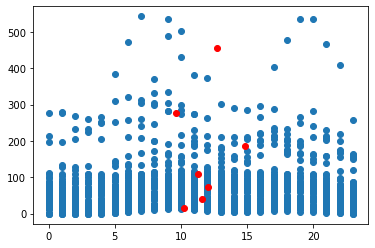

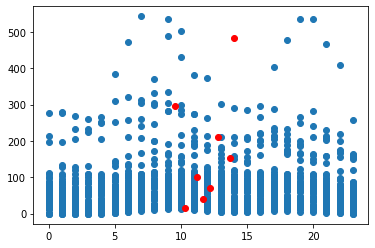

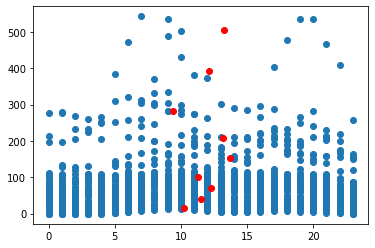

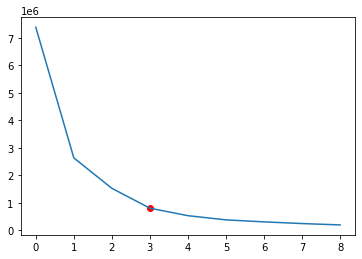

In [8]:
inters = []

for i in range(1, 10):

    kmeans = KMeans(n_clusters=i, random_state=0, max_iter = 300)

    kmeans.fit(trainX)

    inters.append(kmeans.inertia_)
    
    plt.scatter(x=y, y=X)
    plt.scatter(x = np.array(kmeans.cluster_centers_)[:, 1], y = np.array(kmeans.cluster_centers_)[:, 0], color="red")
    plt.show()

plt.plot(inters)
plt.scatter(x = 3, y = inters[3], color="red")


In [9]:
finKmeans = KMeans(n_clusters=3, random_state=19, max_iter = 300).fit(X)

preds = finKmeans.predict(np.hstack((np.array(price_sek).reshape(-1, 1), np.array(hours).reshape(-1, 1))))

print(preds)

ValueError: Expected 2D array, got 1D array instead:
array=[26.9  28.78 29.07 ... 17.97 18.08 17.02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

try to train using the previous days or a few days before data. Not full data becuase too many data and the cluster becomes too confused, try using a smaller sample size and just the data for the hours in one or two days?? Too many outliers which skews the data

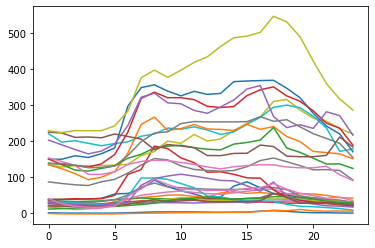

In [11]:
X = []
y = []
means = []
y1 = []
mat = []

for j in range(1,30):
    response = requests.get(f"https://mgrey.se/espot?format=json&date=2022-{11}-{j}")
    d = response.json()
    avgSum = []
    for k in d["SE1"]:
      X.append(k["price_sek"])
      avgSum.append(k["price_sek"])
      y.append(k["hour"])
    
    y1.append(j)
    means.append(sum(avgSum)/len(avgSum))
    mat.append(avgSum)
    plt.plot(avgSum)

(29, 24)


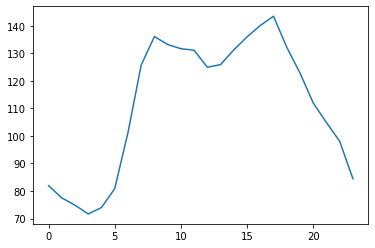

In [16]:
mat = np.array(mat)

print(mat.shape)

matMean = np.mean(np.array(mat), axis=0)

plt.plot(matMean)

[[501.20428571]
 [230.06      ]
 [397.37      ]
 [295.25333333]]


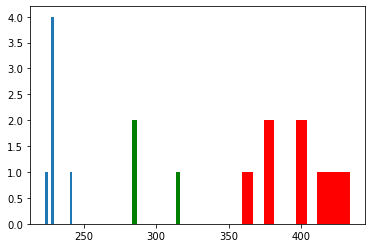

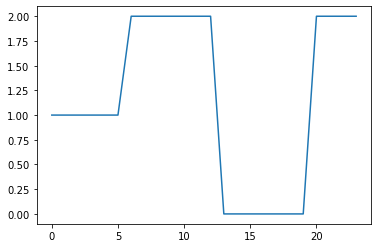

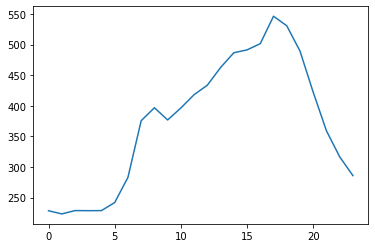

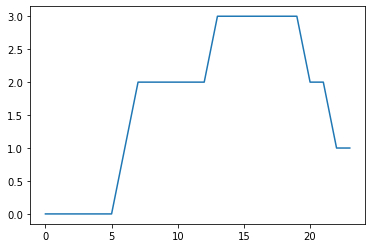

In [137]:
tryKmeans = KMeans(n_clusters=4, random_state=19, max_iter = 300).fit_predict(np.array(price_sek).reshape(-1,1))

tryKmeans1 = KMeans(n_clusters=4, random_state=19, max_iter = 300).fit(np.array(price_sek).reshape(-1,1))

print(tryKmeans1.cluster_centers_)

plt.hist(np.array(price_sek)[np.where(tryKmeans==1)])
plt.hist(np.array(price_sek)[np.where(tryKmeans==2)], color="red")
plt.hist(np.array(price_sek)[np.where(tryKmeans==3)], color="green")
plt.show()

tryKmeans[np.where(tryKmeans==2)] = 3
tryKmeans[np.where(tryKmeans==1)] = 1
tryKmeans[np.where(tryKmeans==3)] = 2

plt.plot(tryKmeans)
plt.show()

plt.plot(price_sek)
plt.show()

plt.plot(kmeans)
plt.show()

use the cluster centers and then based on whether the values in the series is greater or lower than the intervel between clusters, then give it a number:

example:

[[501.20428571]
 [230.06      ]
 [397.37      ]
 [295.25333333]]
 
0 > x > 230

230 > x > 295

295 > x > 397

397 > x > 501




In [149]:
intervals = np.sort(np.array(tryKmeans1.cluster_centers_).flatten())

m = []

for i in price_sek:
    if i <= intervals[0]:
        m.append(0)
    elif i > intervals[0] and i <= intervals[1]:
        m.append(1)
    elif i > intervals[1] and i <= intervals[2]:
        m.append(2)
    elif i > intervals[2] and i <= intervals[3]:
        m.append(3)
    else:
        m.append(4)

print(m)
        

[0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 2, 2, 1]


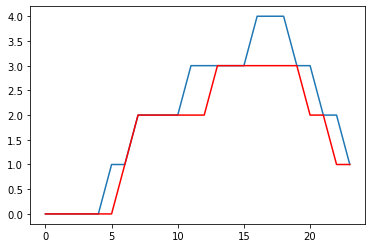

In [151]:
plt.plot(m)
plt.plot(kmeans, color="red")
plt.show()

(array([1., 0., 0., 0., 0., 0., 1., 0., 0., 1.]),
 array([501.51 , 505.986, 510.462, 514.938, 519.414, 523.89 , 528.366,
        532.842, 537.318, 541.794, 546.27 ]),
 <BarContainer object of 10 artists>)

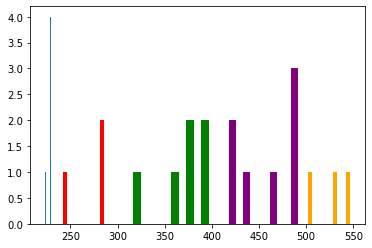

In [153]:
m = np.array(m)
price_sek = np.array(price_sek)

plt.hist(price_sek[np.where(m == 0)])
plt.hist(price_sek[np.where(m == 1)], color="red")
plt.hist(price_sek[np.where(m == 2)], color="green")
plt.hist(price_sek[np.where(m == 3)], color="purple")
plt.hist(price_sek[np.where(m == 4)], color="orange")

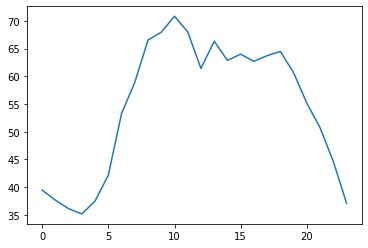

In [54]:
X = []
y = []
means = []
y1 = []
mat = []

for j in range(1,30):
    for i in range(9,12):
        response = requests.get(f"https://mgrey.se/espot?format=json&date=2022-{i}-{j}")
        d = response.json()
        avgSum = []
        for k in d["SE1"]:
          X.append(k["price_sek"])
          avgSum.append(k["price_sek"])
          y.append(k["hour"])      
        y1.append(j)
        means.append(sum(avgSum)/len(avgSum))
        mat.append(avgSum)

#X = np.mean(np.array(mat), axis=0)

X = np.array(mat).T
Xmean = []

for i in X:
    i = list(i)
    for j in i:
        if j > np.std(np.array(i))*2:
            i.remove(j)
    i = np.array(i)
    Xmean.append(np.mean(i))

plt.plot(Xmean)
    

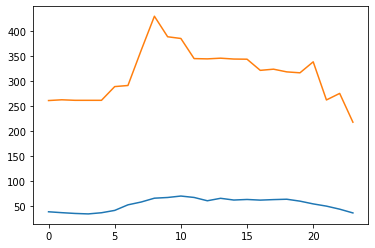

In [55]:
plt.plot(Xmean)
plt.plot(price_sek)

Average the values for every hour for the past 3 or 4 days to get the most recent context and to flatten the outliers, use that data to then classify the singular line.

C:\Users\Shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


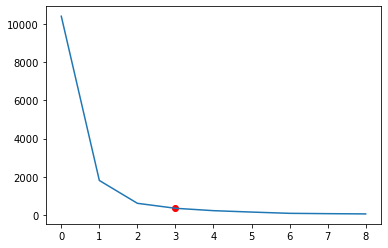

In [41]:
inters = []
Xmean = np.array(Xmean).reshape(-1,1)
#Xtrain = np.hstack((X.reshape(-1,1), y.reshape(-1,1)))

#print(X.shape, y.shape)

for i in range(1, 10):

    kmeans = KMeans(n_clusters=i, random_state=0, max_iter = 300)

    kmeans.fit(Xmean)

    inters.append(kmeans.inertia_)
 
plt.plot(inters)
plt.scatter(x = 3, y = inters[3], color="red")


In [45]:
Finkmeans = KMeans(n_clusters=3, random_state=0, max_iter = 300)

Finkmeans.fit(Xmean)

finBounds = np.sort(np.array(Finkmeans.cluster_centers_).flatten())

print(finPreds)

[ 59.38416149  83.45657312 106.18452734]


261.31
262.82
261.77
261.77
261.77
289.15
291.33
361.52
429.47
388.53
385.12
345
344.44
345.81
344.09
343.78
321.53
323.88
318.49
316.64
338.53
262.49
275.55
218.13


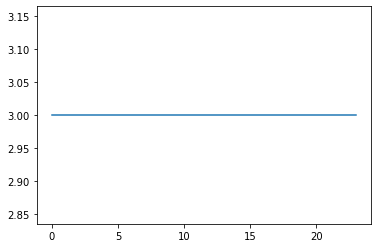

TypeError: float() argument must be a string or a number, not 'KMeans'

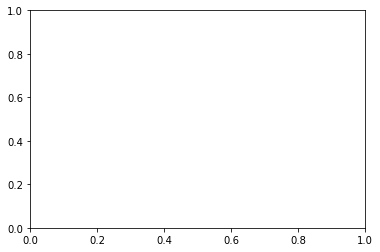

In [49]:
preds = []

for i in price_sek:
    print(i)
    if i <= finBounds[0]: 
        preds.append(0)
    elif i > finBounds[0] and i <= finBounds[1]:
        preds.append(1)
    elif i > finBounds[1 ] and i <= finBounds[2]:
        preds.append(2)
    else:
        preds.append(3)

plt.plot(preds)
plt.show()
plt.plot(kmeans)
plt.show()

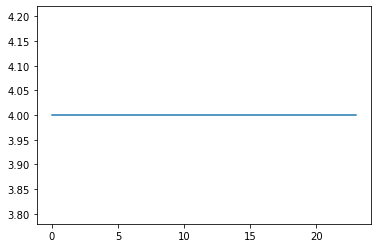

TypeError: float() argument must be a string or a number, not 'KMeans'

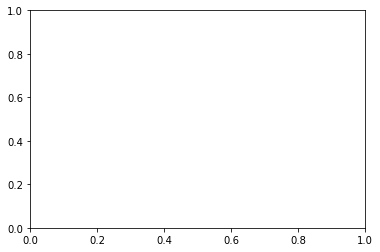

In [185]:
finModel = KMeans(n_clusters=3, random_state=0, max_iter = 300)

finModel.fit(Xtrain)

finBounds = np.sort(np.array(finModel.cluster_centers_).flatten())

preds = []

for i in price_sek:
    if i <= finBounds[0]: 
        preds.append(0)
    elif i > finBounds[0] and i <= finBounds[1]:
        preds.append(1)
    elif i > finBounds[1 ] and i <= finBounds[2]:
        preds.append(2)
    elif i > finBounds[2] and i <= finBounds[3]:
        preds.append(3)
    else:
        preds.append(4)

plt.plot(preds)
plt.show()
plt.plot(kmeans)
plt.show()